In [1]:
import openpyxl
import numpy as np
np.float = float
np.int = int
np.object = object
np.bool = bool
np.str = str

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt




c:\Users\balogy\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data_path = 'C:/dissemination_team/gdhi_qa/ITL_Data.xlsx'
shape_path = 'C:/dissemination_team/gdhi_qa/NUTS1_Jan_2018_UGCB_in_the_UK_2022_-7602393063213847322/NUTS1_Jan_2018_UGCB_in_the_UK.shp'

In [3]:
df = pd.read_excel(data_path)
shape = gpd.read_file(shape_path)

In [29]:
'''
gdf = shape
# Convert GeoDataFrame to DataFrame
df1 = pd.DataFrame(gdf.drop(columns='geometry'))
# Save DataFrame to Excel
df1.to_csv('itlshape.csv', index=False)
'''

In [4]:
df.head()

,Organisation,ITL1,Score
0,UKC,North East (England),0.25
1,UKD,North West (England),0.65
2,UKE,Yorkshire and The Humber,0.63
3,UKF,East Midlands (England),0.21
4,UKG,West Midlands (England),0.47


In [5]:
shape.head()

,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,GlobalID,geometry
0,UKC,North East (England),417313,600358,-1.72890,55.297031,628608f5-673c-45c8-9082-f57ed9604a20,"MULTIPOLYGON (((397942.931 657535.008, 400000...."
1,UKD,North West (England),350015,506280,-2.77237,54.449451,0413c215-94f7-4f2e-a0fd-37d517177413,"MULTIPOLYGON (((357136.203 587050.898, 356937...."
2,UKE,Yorkshire and The Humber,446903,448736,-1.28712,53.932640,d608863c-86bd-4877-b3b8-247794a0825a,"POLYGON ((479999.978 517670.160, 481340.496 51..."
3,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,428c9691-f97b-4fa3-aef8-b3d8c0789cf9,"POLYGON ((516022.702 412210.895, 515854.099 41..."
4,UKG,West Midlands (England),386294,295477,-2.20358,52.556969,a8a5953c-6a23-4fca-b1c7-96d80a29dd95,"POLYGON ((409402.997 365710.796, 412633.099 36..."


In [7]:
shape = pd.merge(
    left=shape,
    right=df,
    left_on='nuts118nm',
    right_on='ITL1',
    how='left'
)

In [8]:
shape.head()

,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,GlobalID,geometry,Organisation,ITL1,Score
0,UKC,North East (England),417313,600358,-1.72890,55.297031,628608f5-673c-45c8-9082-f57ed9604a20,"MULTIPOLYGON (((397942.931 657535.008, 400000....",UKC,North East (England),0.25
1,UKD,North West (England),350015,506280,-2.77237,54.449451,0413c215-94f7-4f2e-a0fd-37d517177413,"MULTIPOLYGON (((357136.203 587050.898, 356937....",UKD,North West (England),0.65
2,UKE,Yorkshire and The Humber,446903,448736,-1.28712,53.932640,d608863c-86bd-4877-b3b8-247794a0825a,"POLYGON ((479999.978 517670.160, 481340.496 51...",UKE,Yorkshire and The Humber,0.63
3,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,428c9691-f97b-4fa3-aef8-b3d8c0789cf9,"POLYGON ((516022.702 412210.895, 515854.099 41...",UKF,East Midlands (England),0.21
4,UKG,West Midlands (England),386294,295477,-2.20358,52.556969,a8a5953c-6a23-4fca-b1c7-96d80a29dd95,"POLYGON ((409402.997 365710.796, 412633.099 36...",UKG,West Midlands (England),0.47


<function matplotlib.pyplot.show(*args, **kw)>

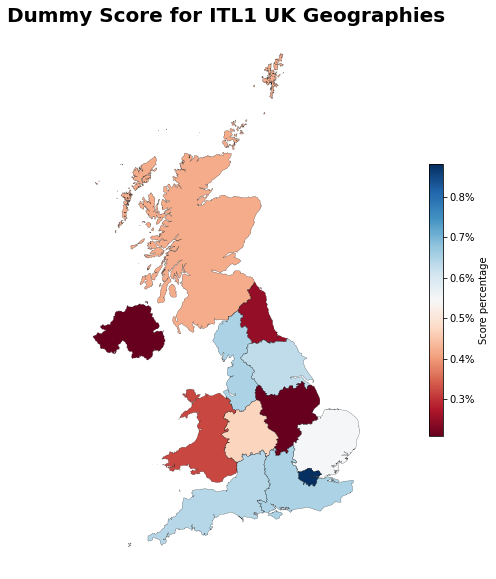

In [39]:
ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(20,10))
shape.plot(ax=ax, column='Score', legend=True, cmap='RdBu', legend_kwds={'label': "Score percentage", 'shrink':0.5, 'format': '%.1f%%'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Dummy Score for ITL1 UK Geographies', size=20, weight='bold')

plt.show